#### Install required packages

In [68]:
%pip install -qr requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Preprocessing

#### Import csv file

In [15]:
import glob
raw_data = glob.glob("*.csv")

In [16]:
import pandas as pd
raw_pd = pd.read_csv(raw_data[0])

#### Preprocess the csv file

In [17]:
filtered_data = raw_pd.drop(columns=
                            ["Timestamp", 
                             "Email Address", 
                             "First Name / Given name ( ପ୍ରଥମ ନାମ )", 
                             "Last name / Surname ( ଶେଷ ନାମ )",
                             "Mother Tongue ( ମାତୃଭାଷା )", 
                             "Mobile Number 1 ( ମୋବାଇଲ୍ ନମ୍ବର ୧ )", 
                             "Mobile Number 2 ( ମୋବାଇଲ୍ ନମ୍ବର ୨  )", 
                             "KIMS ID ( କିମସ ପରିଚୟ ନମ୍ବର )", 
                             "Town / District ( ସହର /ଜିଲ୍ଲା )", 
                             "State ( ରାଜ୍ୟ )", 
                             "Upload a photo of your hands against a white background as given below.\nନିମ୍ନରେ ଦିଆଯାଇଥିବା ଧଳା ପୃଷ୍ଠଭୂମିରେ ଆପଣଙ୍କ ହାତର ଏକ ଫଟୋ ଅପଲୋଡ୍ କରନ୍ତୁ।",
                             "VAS",
                             "DAS28 ESR",
                             "Treatment ",
                             "Swollen joint count",
                             "tender joint count",
                             ])

In [18]:
columns = {
    'Age ( ବୟସ  ) [Age]': 'age',
    'Gender ( ଲିଙ୍ଗ )': 'gender',
    'What problem are you facing?\nଆପଣ କେଉଁ ସମସ୍ୟାର ସମ୍ମୁଖୀନ ହେଉଛନ୍ତି ?': 'problems',
    'When did the problem first start? \nଏହା କେବେ ଆରମ୍ବ ହେଲା ? [Days]': 'problem-days',
    'When did the problem first start? \nଏହା କେବେ ଆରମ୍ବ ହେଲା ? [Weeks]': 'problem-weeks',
    'When did the problem first start? \nଏହା କେବେ ଆରମ୍ବ ହେଲା ? [Months]': 'problem-months',
    'When did the problem first start? \nଏହା କେବେ ଆରମ୍ବ ହେଲା ? [10]': 'problem-years10',
    'Do you have pain anywhere else in your body?\n(ଆପଣଙ୍କ ଶରୀରର ଅନ୍ୟ କୌଣସି ସ୍ଥାନ ରେ ଯନ୍ତ୍ରଣା ଅଛି କି ?)': 'pain-here',
    'Tick mark the numbers corresponding to areas where you feel pain.\nଆପଣଙ୍କ ଶରୀରରେ କେଉଁଠାରେ ଯନ୍ତ୍ରଣା ଅଛି ସେହି ସଂଖ୍ୟା ଗୁଡିକୁ ଠିକ ଚିହ୍ନ ମାରନ୍ତୁ . [Image 1]': 'image1-loc',
    'Tick mark the numbers corresponding to areas where you feel pain.\nଆପଣଙ୍କ ଶରୀରରେ କେଉଁଠାରେ ଯନ୍ତ୍ରଣା ଅଛି ସେହି ସଂଖ୍ୟା ଗୁଡିକୁ ଠିକ ଚିହ୍ନ ମାରନ୍ତୁ . [Image 2]': 'image2-loc',
    'Have you noticed any deformit  in your joints?\nତୁମର ଗଣ୍ଠି ରେ କୌଣସି ବିକଳାଙ୍ଗତା ଲକ୍ଷ କରିଛ କି ?': 'joint-deformit',
    'Tick mark the numbers corresponding to areas where you  noticed any swelling.\nଆପଣଙ୍କ ଶରୀରରେ କେଉଁଠାରେ  ଫୁଲା ଲକ୍ଷ କରିଛନ୍ତି, ସେହି ସଂଖ୍ୟା ଗୁଡିକୁ ଠିକ ଚିହ୍ନ ମାରନ୍ତୁ . [Image 1]': 'swelling1',
    'Tick mark the numbers corresponding to areas where you  noticed any swelling.\nଆପଣଙ୍କ ଶରୀରରେ କେଉଁଠାରେ  ଫୁଲା ଲକ୍ଷ କରିଛନ୍ତି, ସେହି ସଂଖ୍ୟା ଗୁଡିକୁ ଠିକ ଚିହ୍ନ ମାରନ୍ତୁ . [Image 2]': 'swelling2',
    'Is the swelling in your joints constant or does it come and go? \nଗଣ୍ଠି ଫୁଲା ସ୍ଥାୟୀ ରହେ କିମ୍ବା କିଛି ସମୟ ପାଇ ଆସେ ଓ ଯାଏ ?': 'swelling-constant',
    'Do your joints appear red when swollen?\nଫୁଲିଯିବା ସମୟ ରେ ଗଣ୍ଠି ଗୁଡିକ ଲାଲ୍ ହୋଇଯାଏ କି ?': 'red-swollen',
    'Do your joints feel warm when you touch them? \nଗଣ୍ଠି ଗୁଡିକ ଛୁଇଁଲେ ଗରମ ଅନୁଭବ କରନ୍ତି କି ?': 'warm-joints',
    'At what time do you feel more pain?\nକେଉଁ ସମୟ ରେ ଆପଣ ଅଧିକ ଯନ୍ତ୍ରଣା ଅନୁଭବ କରନ୍ତି ?': 'pain-time',
    'Does the pain disturb your sleep?\nଯନ୍ତ୍ରଣା ଆପଣଙ୍କ ନିଦକୁ ବ୍ୟାକୁଳ କରେ କି ?': 'sleep-disturb',
    'How many hours of sleep are you getting?\nଆପଣ କେତେ ଘଣ୍ଟା ଶୁଅନ୍ତି ?': 'sleep-hours',
    'Does physical activity increase or reduce the pain?\nଶାରୀରିକ କାର୍ଯକଳାପ ଯନ୍ତ୍ରଣା ବଢାଏ କି ?': 'increase-pain',
    'Does taking rest increase or reduce the pain? \nବିଶ୍ରାମ ନେବା ଯନ୍ତ୍ରଣା ହ୍ରାସ କରେ କି ?': 'rest-increase',
    'Do you have to take painkillers for your pain?  \nଯନ୍ତ୍ରଣା ପାଇଁ ପେନକିଲର ନିଅନ୍ତି କି ?': 'painkillers',
    'How does the pain respond to painkillers?\nଯନ୍ତ୍ରଣା ପେନକିଲର କୁ କିପରି ପ୍ରତିକ୍ରିୟା କରେ ?': 'response-painkillers',
    'What other symptoms do you have except pain? \nଯନ୍ତ୍ରଣା ବ୍ୟତୀତ ତୁମର ଆଉ କେଉଁ ଲକ୍ଷଣ ଅଛି ?': 'other-symptoms',
    'Have you ever had a fever? If yes, what was the temperature for fever? \nଆପଣ କେବେ ଜ୍ଵର ଅନୁଭବ କରିଛନ୍ତି କି ? ଯଦି ହଁ, ତାପମାତ୍ରା କେତେ ଥିଲା ?': 'temp',
    'Have you ever had a skin rash? If yes, in which part of the body?  \nତୁମର କେବେ ଚର୍ମ ଦାଗ ହେଇଛି କି ?': 'skin-rash',
    'Does your skin rash increase on going out in the sun?  \nସୁର୍ଯ କିରଣ ରେ ତୁମ ଚର୍ମ ଦାଗ ବଢିଯାଏ କି ?': 'rash-sun',
    'Have you ever had mouth ulcers?  \nପାଟି କେବେ ଘା ହୋଇଛି କି ?': 'mouth-ulcers',
    'Do you ever have grittiness in your eyes (sand like sensation/ itching)?  \nଆଖି ରେ କେବେ ବାଲି ପଶିବା ଭଳି କି କୁଣ୍ଡେଇ ହେବା ଅନୁଭବ କରିଛନ୍ତି କି ?': 'eye-grittiness',
    'Have you ever had to use eye drops for dryness in your eyes?  \nଆଖିରେ ଶୁଷ୍କତା ପାଇଁ କେବେ ଆଖି ଔଷଧ ବ୍ୟବହାର କରିଛନ୍ତି କି ?': 'eye-drops',
    'Do you have difficulty in swallowing dry foods like biscuits, rice (without daal/liquidish soup), moori (without water).\nବିସକୁଟ , ଚାଉଳ , ମୁଢି ପରି ଶୁଖିଲା ଖାଦ୍ୟ ( ବିନା ଡାଲି କିମ୍ବା ପାଣି ରେ  ) ଗିଳିବାରେ ଅସୁବିଧା ଅଛି କି ?': 'difficult-swallowing',
    'Is there difficulty in getting up from the chair? \nଚେୟାର ରୁ ଉଠିବା ରେ ଅସୁବିଧା ହେଉଛି  କି ?': 'difficult-wakingup',
    'Is there difficulty in sitting up in the bed from lying down? \nଖଟ ଉପରେ ବସିବା ଓ ଉଠିବା ରେ କୌଣସି ଅସୁବିଧା ହେଉଛି କି ?': 'difficult-sitting',
    'Have you ever been diagnosed with skin disease like psoriasis?   \nସୋରିୟସୀସ୍ ପରି ଚର୍ମ ରୋଗ ରେ ଆକ୍ରାନ୍ତ ହୋଇଛନ୍ତି କି ?': 'psoriasis',
    'Have you had ulcers/wounds on your skin that took longer than usual to heal?   \nଆପଣଙ୍କ ଚର୍ମରେ ଅଲସର / କ୍ଷତ  ଥିଲା କି ଯାହାକୁ ଭଲ କରିବା ପାଇଁ ସ୍ୱାଭାବିକ ଠାରୁ ଅଧିକ ସମୟ ଲାଗିଥିଲା?': 'longer-heal-time',
    'Have you ever had a painful red eye? \nକେବେ ଯନ୍ତ୍ରଣା ଦାଯକ ଲାଲ୍ ଆଖି ହୋଇଛି କି ?': 'painful-eye',
    'Have you ever had a cough for more than 6 weeks?  \nଆପଣଙ୍କର କେବେ ୬ ସପ୍ତାହ ରୁ ଅଧିକ କାଶ ହୋଇଛି କି ?': 'cough',
    'Have you diagnosed rheumatoid arthraitis or any other?': 'previous-ra',
    'Have you ever given any medicines for Arthritis? If yes, how did you respond to those medicines?  \nଆପଣ କେବେ ଆର୍ଥ୍ରାଇଟିସ୍ ପାଇଁ କୌଣସି ଔଷଧ ନେଇଛନ୍ତି କି? ଯଦି ହଁ, ତେବେ ଆପଣ ସେହି ଔଷଧଗୁଡ଼ିକ କିପରି ପ୍ରତିକ୍ରିୟା କଲେ ?  ': 'medicines',
    'Are you taking medicine for any of the following ?\nଆପଣ ନିମ୍ନଲିଖିତ ମଧ୍ୟରୁ କୌଣସି ପାଇଁ ଔଷଧ ଖାଉଛନ୍ତି କି?': 'medicines-now',
    'When did the problem first start? \nଏହା କେବେ ଆରମ୍ବ ହେଲା ? [Years]': 'problem-years',
    'Final diagnosis ( by doctor )': 'final-diagnosis',
    }

filtered_data.rename(columns=columns, inplace=True)

In [19]:
filtered_data.columns

Index(['age', 'gender', 'problems', 'problem-days', 'problem-weeks',
       'problem-months', 'problem-years10', 'pain-here', 'image1-loc',
       'image2-loc', 'joint-deformit', 'swelling1', 'swelling2',
       'swelling-constant', 'red-swollen', 'warm-joints', 'pain-time',
       'sleep-disturb', 'sleep-hours', 'increase-pain', 'rest-increase',
       'painkillers', 'response-painkillers', 'other-symptoms', 'temp',
       'skin-rash', 'rash-sun', 'mouth-ulcers', 'eye-grittiness', 'eye-drops',
       'difficult-swallowing', 'difficult-wakingup', 'difficult-sitting',
       'psoriasis', 'longer-heal-time', 'painful-eye', 'cough', 'previous-ra',
       'medicines', 'medicines-now', 'problem-years', 'final-diagnosis'],
      dtype='object')

In [20]:
columns_to_replace = {
    'problems': [' ( ଗଣ୍ଠି ଯନ୍ତ୍ରଣା )', ' ( ଗଣ୍ଠି ଫୁଲିବା )', ' ( ସକାଳ କଠିନତା )', ' ( ହାତ/ ପାଦ ଚଳାଇବାରେ ଅସମର୍ଥତା )'],
    'pain-here': [' ( ହଁ, ଉପର ପିଠି ଯନ୍ତ୍ରଣା )', ' ( ହଁ, ନିମ୍ନ ପିଠି ଯନ୍ତ୍ରଣା )', ' ( ନା )'],
    'joint-deformit': [' ( ହଁ, ବାମ ହାତ )', ' ( ହଁ, ଡାହାଣ ହାତ )', ' ( ହଁ, ବାମ ପାଦ )', ' ( ହଁ, ଡାହାଣ ପାଦ )', 
                       ' ( ହଁ, ବାମ ଗୋଡ଼ )', ' ( ହଁ, ଡାହାଣ ଗୋଡ଼ )', ' ( ହଁ, ବାମ କହୁଣୀ )', ' ( ହଁ, ଡାହାଣ କହୁଣୀ )'],
    'swelling-constant': [' ( ଆସେ ଓ ଯାଏ )', ' ( ସ୍ଥାୟୀ )', ' ( ପ୍ରଯୁଜ୍ୟ ନୁହେଁ )'],
    'red-swollen': [' ( ନା )', ' ( ହଁ )', ' ( ପ୍ରଯୁଜ୍ୟ ନୁହେଁ )'],
    'warm-joints': [' ( ନା )', ' ( ହଁ )', ' ( ପ୍ରଯୁଜ୍ୟ ନୁହେଁ )'],
    'pain-time': [' ( ସକାଳେ )', ' ( ରାତି  ରେ )', ' ( ସବୁ ବେଳେ )', ' ( ସନ୍ଧ୍ୟା ରେ )'],
    'sleep-disturb': [' ( ନା )', ' ( ହଁ )', ' ( ବେଳେ ବେଳେ )'],
    'increase-pain': [' ( କମେ )', ' ( ବଢେ )'],
    'rest-increase': [' ( କମେ )', ' ( ବଢେ )'],
    'warm-joints': [' ( ନା )', ' ( ହଁ )', ' ( ପ୍ରଯୁଜ୍ୟ ନୁହେଁ )'],
    'painkillers': [' ( ନା )', ' ( ହଁ )'],
    'response-painkillers': [' ( ଭଲ ଆଶ୍ୱସ୍ତି )', ' ( ସାମାନ୍ୟ ଆଶ୍ୱସ୍ତି )', ' ( ମଧ୍ୟମ ଧରଣର ରିଲିଫ୍ )', ' ( ପ୍ରଯୁଜ୍ୟ ନୁହେଁ )'],
    'other-symptoms': [' ( ଗଣ୍ଠି ଯନ୍ତ୍ରଣା )', ' ( ଗଣ୍ଠି ଫୁଲା )', ' ( ହାତ / ପାଦ ଚଳାଇବାରେ ଅକ୍ଷମତା )', ' ( ପ୍ରଯୁଜ୍ୟ ନୁହେଁ )'],
    'temp': [' ( ହଁ, 100° ଫାରେନହାଇଟ୍ ରୁ କମ୍ )', ' ( ହଁ, 100-102° F )', ' ( ନା )', ' ( ହଁ, 102° ଫାରେନହାଇଟ୍ ରୁ ଅଧିକ )'],
    'skin-rash': [' ( ନାହିଁ )', ' ( ହଁ, ଚେହେରା )', ' ( ହଁ, ହାତ / ପାଦ )'],
    'rash-sun': [' ( ନା )', ' ( ହଁ )'],
    'mouth-ulcers':  [' ( ନା )', ' ( ହଁ )'],
    'eye-grittiness': [' ( ନା )', ' ( କୁଣ୍ଡେଇ ହେବା )', ' ( ବାଲି ପରି ସମ୍ବେଦନା )'],
    'eye-drops': [' ( ନା )', ' ( ହଁ )'],
    'cough': [' ( ନା )', ' ( ହଁ )'],
    'painful-eye': [' ( ନା )', ' ( ହଁ )'],
    'longer-heal-time': [' ( ନା )', ' ( ହଁ )'],
    'psoriasis': [' ( ନା )', ' ( ହଁ )'],
    'difficult-sitting': [' ( ନା )', ' ( ହଁ )'],
    'difficult-wakingup': [' ( ନା )', ' ( ହଁ )'],
    'difficult-swallowing': [' ( ନା )', ' ( ହଁ )'],
    'previous-ra': [' ( ହଁ, ଆର୍ଥ୍ରାଇଟିସ୍ )', ' ( ନା )'],
    'medicines': [' ( ନା )', ' ( ହଁ, ମୁଁ ସାହାଯ୍ୟ କଲି )', ' ( ହଁ, କିନ୍ତୁ ସେମାନେ ସାହାଯ୍ୟ କଲେ ନାହିଁ )'],
    'medicines-now': [' ( ନା )', ' ( ହଁ, ଥାଇରଏଡ୍ ସମସ୍ୟା )', ' ( ହଁ, ଉଚ୍ଚ ରକ୍ତଚାପ )', ' ( ହଁ, ଥାଇରଏଡ୍ ସମସ୍ୟା )', ' ( ହଁ,  ମଧୁମେହ ରୋଗ )'],
}


for column, substrings in columns_to_replace.items():
    val = {}
    d = filtered_data[column].unique()
    for i in list(d):
        new_i = i
        try:
            for substring in substrings:
                new_i = new_i.replace(substring, '')
        except:
            pass
        
        val[i] = new_i
    filtered_data[column] = filtered_data[column].map(val)

In [21]:
DAYS_IN_WEEK = 7
DAYS_IN_MONTH = 30
DAYS_IN_YEAR = 365

filtered_data['total_days'] = (
    filtered_data['problem-days'].fillna(0) +
    filtered_data['problem-weeks'].fillna(0) * DAYS_IN_WEEK +
    filtered_data['problem-months'].fillna(0) * DAYS_IN_MONTH +
    filtered_data['problem-years'].fillna(0) * DAYS_IN_YEAR
)

columns_to_remove = ['problem-days', 'problem-weeks', 'problem-months', 'problem-years']
filtered_data.drop(columns=columns_to_remove, inplace=True)

In [22]:
# Convert all values in the DataFrame to lowercase
filtered_data = filtered_data.map(lambda x: x.lower() if isinstance(x, str) else x)

In [23]:
diagnosis_corrections = {
    'rheumatoid arthritis ': 'rheumatoid arthritis',
    'rheumatoid arthritisr': 'rheumatoid arthritis',
    'rheumatoid arthrtiis': 'rheumatoid arthritis',
    'rheumaoid arthritis': 'rheumatoid arthritis',
    'fibromyalgia ': 'fibromyalgia'
}

filtered_data['final-diagnosis'] = filtered_data['final-diagnosis'].replace(diagnosis_corrections)

In [24]:
filtered_data_diagnosed = filtered_data[filtered_data['final-diagnosis'].notnull()]

In [ ]:
IMAGE1_MAPPING = {
    1: "Forehead",
    2: "Right TMJ joint",
    3: "Right shoulder",
    4: "Right upper arm",
    5: "Right forearm",
    6: "Right wrist",
    7: "Right MCP (Metacarpal phalangeal joint)",
    8: "Right PIP (Proximal interphalangeal joint)",
    9: "Right thigh",
    10: "Right knee",
    11: "Right ankle",
    12: "Right midfoot",
    13: "Right toes",
    14: "Left TMJ joint",
    15: "Left shoulder",
    16: "Left upper arm",
    17: "Left forearm",
    18: "Left writst",
    19: "Right MCP (Metacarpal phalangeal joint)",
    20: "Right PIP (Proximal interphalangeal joint)",
    21: "Right thigh",
    22: "Right knee",
    23: "Right ankle",
    24: "Right midfoot",
    25: "Right toes",
}

IMAGE2_MAPPING = {
    1: "Suboccipital region",
    2: "Posterior cervical region",
    3: "Left shoulder (post)",
    4: "Left elbow",
    5: "Lower back (left PSIS)",
    6: "Left hip buttock",
    7: "Left calf",
    8: "Left heel",
    9: "Suboccipital region",
    10: "Upper back",
    11: "Right shoulder (post)",
    12: "Middle back",
    13: "Lower midback",
    14: "Right elbow",
    15: "Right PSIS",
    16: "Low back",
    17: "Right hip buttock",
    18: "Right calf",
    19: "Right heel"
}

# Map 'image1-loc' values using IMAGE1_MAPPING
filtered_data_diagnosed.loc[:, 'image1-loc-mapped'] = filtered_data_diagnosed['image1-loc'].apply(
    lambda x: ', '.join([IMAGE1_MAPPING.get(int(i), "Unknown") for i in str(x).split(', ')]) if pd.notnull(x) else x
)

# Map 'image2-loc' values using IMAGE2_MAPPING
filtered_data_diagnosed.loc[:, 'image2-loc-mapped'] = filtered_data_diagnosed['image2-loc'].apply(
    lambda x: ', '.join([IMAGE2_MAPPING.get(int(i), "Unknown") for i in str(x).split(', ')]) if pd.notnull(x) else x
)

# Map 'swelling1' values using IMAGE1_MAPPING
filtered_data_diagnosed.loc[:, 'swelling1-mapped'] = filtered_data_diagnosed['swelling1'].apply(
    lambda x: ', '.join([IMAGE1_MAPPING.get(int(i), "Unknown") for i in str(x).split(', ')]) if pd.notnull(x) else x
)

# Map 'swelling2' values using IMAGE2_MAPPING
filtered_data_diagnosed.loc[:, 'swelling2-mapped'] = filtered_data_diagnosed['swelling2'].apply(
    lambda x: ', '.join([IMAGE2_MAPPING.get(int(i), "Unknown") for i in str(x).split(', ')]) if pd.notnull(x) else x
)

# Drop the old columns
columns_to_drop = ['image1-loc', 'image2-loc', 'swelling1', 'swelling2']
filtered_data_diagnosed = filtered_data_diagnosed.drop(columns=columns_to_drop)

C:\Users\umaka\AppData\Local\Temp\ipykernel_744\935882189.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_diagnosed.loc[:, 'image1-loc-mapped'] = filtered_data_diagnosed['image1-loc'].apply(
C:\Users\umaka\AppData\Local\Temp\ipykernel_744\935882189.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_diagnosed.loc[:, 'image2-loc-mapped'] = filtered_data_diagnosed['image2-loc'].apply(
C:\Users\umaka\AppData\Local\Temp\ipykernel_744\935882189.py:62: SettingWithCopyWarning: 
A 

In [26]:
fibromyalgia_df = filtered_data_diagnosed[filtered_data_diagnosed['final-diagnosis'] == 'fibromyalgia']
rheumatoid_arthritis_df = filtered_data_diagnosed[filtered_data_diagnosed['final-diagnosis'] == 'rheumatoid arthritis']

fibromyalgia_knowledge_base = fibromyalgia_df.iloc[:25]
rheumatoid_arthritis_knowledge_base = rheumatoid_arthritis_df.iloc[:125]

knowledge_base_df = pd.concat([fibromyalgia_knowledge_base, rheumatoid_arthritis_knowledge_base], ignore_index=True)

fibromyalgia_test = fibromyalgia_df.iloc[25:50]
rheumatoid_arthritis_test = rheumatoid_arthritis_df.iloc[125:150]

test_df = pd.concat([fibromyalgia_test, rheumatoid_arthritis_test], ignore_index=True)

In [ ]:
filtered_data_diagnosed.to_csv("preprocessed_data.csv")

## Agentic Framework

In [1]:
import pandas as pd
filtered_data_diagnosed = pd.read_csv("preprocessed_data.csv")

In [2]:
fibromyalgia_df = filtered_data_diagnosed[filtered_data_diagnosed['final-diagnosis'] == 'fibromyalgia']
rheumatoid_arthritis_df = filtered_data_diagnosed[filtered_data_diagnosed['final-diagnosis'] == 'rheumatoid arthritis']

fibromyalgia_knowledge_base = fibromyalgia_df.iloc[:25]
rheumatoid_arthritis_knowledge_base = rheumatoid_arthritis_df.iloc[:125]

knowledge_base_df = pd.concat([fibromyalgia_knowledge_base, rheumatoid_arthritis_knowledge_base], ignore_index=True)

fibromyalgia_test = fibromyalgia_df.iloc[25:50]
rheumatoid_arthritis_test = rheumatoid_arthritis_df.iloc[125:150]

test_df = pd.concat([fibromyalgia_test, rheumatoid_arthritis_test], ignore_index=True)

### Patient prompt design

In [3]:
import pandas as pd

def create_patient_prompt(patient_data):
    prompt = f"""
Patient Information:

Age: {patient_data['age']}
Gender: {patient_data['gender']}
Problems: {patient_data['problems']}
Duration of Problem: {patient_data['total_days']} days
Pain Location: {patient_data['pain-here']}
Pain Areas (Image 1): {patient_data['image1-loc-mapped']}
Pain Areas (Image 2): {patient_data['image2-loc-mapped']}
Joint Deformity: {patient_data['joint-deformit']}
Swelling Areas (Image 1): {patient_data['swelling1-mapped']}
Swelling Areas (Image 2): {patient_data['swelling2-mapped']}
Swelling Pattern: {patient_data['swelling-constant']}
Redness in Swollen Joints: {patient_data['red-swollen']}
Warm Joints: {patient_data['warm-joints']}
Pain Time: {patient_data['pain-time']}
Sleep Disturbance: {patient_data['sleep-disturb']}
Sleep Hours: {patient_data['sleep-hours']}
Physical Activity Impact: {patient_data['increase-pain']}
Rest Impact: {patient_data['rest-increase']}
Painkillers: {patient_data['painkillers']}
Painkiller Response: {patient_data['response-painkillers']}
"""

    # Handle missing values
    
    # Handle missing values
    if pd.notnull(patient_data['other-symptoms']):
        if patient_data['other-symptoms'] == 'No':
            prompt += f"Other symptoms: No\n"
        else:
            prompt += f""
            
    if pd.notnull(patient_data['temp']):
        if patient_data['temp'] == 'no':
            prompt += f"Fever: No\n"
        else:
            prompt += f"Fever: {patient_data['temp']}\n"

    if pd.notnull(patient_data['skin-rash']):
        if patient_data['skin-rash'] == 'no':
            prompt += f"Skin Rash: No\n"
        else:
            prompt += f"Skin Rash: {patient_data['skin-rash']}\n"

    if pd.notnull(patient_data['rash-sun']):
        if patient_data['rash-sun'] == 'no':
            prompt += f"Rash in Sun: No\n"
        else:
            prompt += f"Rash in Sun: {patient_data['rash-sun']}\n"

    if pd.notnull(patient_data['mouth-ulcers']):
        if patient_data['mouth-ulcers'] == 'no':
            prompt += f"Mouth Ulcers: No\n"
        else:
            prompt += f"Mouth Ulcers: {patient_data['mouth-ulcers']}\n"

    if pd.notnull(patient_data['eye-grittiness']):
        if patient_data['eye-grittiness'] == 'no':
            prompt += f"Eye Grittiness: No\n"
        else:
            prompt += f"Eye Grittiness: {patient_data['eye-grittiness']}\n"

    if pd.notnull(patient_data['eye-drops']):
        if patient_data['eye-drops'] == 'no':
            prompt += f"Eye Drops: No\n"
        else:
            prompt += f"Eye Drops: {patient_data['eye-drops']}\n"

    if pd.notnull(patient_data['difficult-swallowing']):
        if patient_data['difficult-swallowing'] == 'no':
            prompt += f"Swallowing Difficulty: No\n"
        else:
            prompt += f"Swallowing Difficulty: {patient_data['difficult-swallowing']}\n"

    if pd.notnull(patient_data['difficult-wakingup']):
        if patient_data['difficult-wakingup'] == 'no':
            prompt += f"Difficulty Waking Up: No\n"
        else:
            prompt += f"Difficulty Waking Up: {patient_data['difficult-wakingup']}\n"

    if pd.notnull(patient_data['difficult-sitting']):
        if patient_data['difficult-sitting'] == 'no':
            prompt += f"Difficulty Sitting Up: No\n"
        else:
            prompt += f"Difficulty Sitting Up: {patient_data['difficult-sitting']}\n"

    if pd.notnull(patient_data['psoriasis']):
        if patient_data['psoriasis'] == 'no':
            prompt += f"Psoriasis: No\n"
        else:
            prompt += f"Psoriasis: {patient_data['psoriasis']}\n"

    if pd.notnull(patient_data['longer-heal-time']):
        if patient_data['longer-heal-time'] == 'no':
            prompt += f"Healing Time: No\n"
        else:
            prompt += f"Healing Time: {patient_data['longer-heal-time']}\n"

    if pd.notnull(patient_data['painful-eye']):
        if patient_data['painful-eye'] == 'no':
            prompt += f"Painful Eye: No\n"
        else:
            prompt += f"Painful Eye: {patient_data['painful-eye']}\n"

    if pd.notnull(patient_data['cough']):
        if patient_data['cough'] == 'no':
            prompt += f"Cough: No\n"
        else:
            prompt += f"Cough: {patient_data['cough']}\n"

    if pd.notnull(patient_data['previous-ra']):
        if patient_data['previous-ra'] == 'no':
            prompt += f"Previous History of Joint Pain, Swelling: No\n"
        else:
            prompt += f"Previous History of Joint Pain, Swelling: Yes\n"

    if pd.notnull(patient_data['medicines']):
        if patient_data['medicines'] == 'no':
            prompt += f"Medication History: No\n"
        else:
            prompt += f"Medication History: {patient_data['medicines']}\n"

    if pd.notnull(patient_data['medicines-now']):
        if patient_data['medicines-now'] == 'no':
            prompt += f"Current Medications: No\n"
        else:
            prompt += f"Current Medications: {patient_data['medicines-now']}\n"

    if pd.notnull(patient_data['final-diagnosis']):
        if patient_data['final-diagnosis'] == "fibromyalgia":
            patient_data['final-diagnosis'] = "Not Rheumatoid Arhtritis"
        else:
            patient_data['final-diagnosis'] = "Rheumatoid Arhtritis"
        prompt += f"Final Diagnosis: {patient_data['final-diagnosis']}\n"

    return prompt

# Create text documents from the DataFrame
knowledge_base_docs = []
for index, row in knowledge_base_df.iterrows():
    patient_prompt = create_patient_prompt(row)
    knowledge_base_docs.append(patient_prompt)

### VectorDB setup with neo4j

In [4]:
import os
from dotenv import load_dotenv
from langchain_neo4j import Neo4jVector
from langchain_openai import OpenAIEmbeddings

# Load environment variables from .env file
load_dotenv()

# Retrieve the OpenAI API key from the environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")

url = os.getenv("NEO4J_URI")
username = os.getenv("NEO4J_USERNAME")
password = os.getenv("NEO4J_PASSWORD")

embeddings = OpenAIEmbeddings(api_key=openai_api_key)

try:
    vectorstore = Neo4jVector.from_existing_index(
        embedding=embeddings, 
        index_name="Chunk",
        url=url,
        username=username,
        password=password,
        )
    print("Loaded from aura db.")
except:
    vectorstore = Neo4jVector.from_texts(
        embedding=embeddings,
        texts=knowledge_base_docs,
        url=url,
        username=username,
        password=password,
    )
    print("Stored in aura db.")
    
retriever = vectorstore.as_retriever()

Loaded from aura db.


### Agent setup

In [132]:
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI

load_dotenv()

models = {
    "GOOGLE": [
        "gemini-1.5-flash",
        "gemini-2.0-flash",
    ],
    "OPENAI": [
        "o1",
        "o3-mini",
    ],
    "QWEN": [
        "qwq-32b:free",
    ],
    "DEEPSEEK": [
        "deepseek/deepseek-r1-zero"
    ]}

provider = "DEEPSEEK"
model = models[provider][0]

if provider == "GOOGLE":
    TIME_S = 5
else:
    TIME_S = 0

if provider == "GOOGE":
    llm = ChatGoogleGenerativeAI(
        model=model, api_key=os.getenv("GEMINI_API_KEY"))
elif provider == "OPENAI":
    llm = ChatOpenAI(model=model, api_key=os.getenv("OPENAI_API_KEY"))
    
elif provider == "QWEN":
    llm = ChatOpenAI(model=model, api_key=os.getenv("OPENROUTER_API_KEY"), base_url="https://openrouter.ai/api/v1")
    
elif provider == "DEEPSEEK":
    llm = ChatOpenAI(model=model, api_key=os.getenv("OPENROUTER_API_KEY"), base_url="https://openrouter.ai/api/v1")

In [133]:
llm.invoke("Hi")

NotFoundError: Error code: 404 - {'error': {'message': 'No endpoints found for deepseek/deepseek-r1-zero.', 'code': 404}, 'user_id': 'user_2uBIeGkYPNeLl6KWj1zUYFSlFKg'}

In [ ]:
from typing import TypedDict

class LlmState(TypedDict):
    prompt: str
    diagnosis: str
    reasons: str

class SoloState(TypedDict):
    prompt: str
    diagnosis: str
    reasons: str
    
class DuoState(TypedDict):
    prompt: str
    symptoms: str
    diagnosis: str
    reasons: str
    
class TrioState(TypedDict):
    prompt: str
    symptoms1: str
    symptoms2: str
    diagnosis: str
    reasons: str
    
class QuartetState(TypedDict):
    prompt: str
    symptoms1: str
    symptoms2: str
    analysis: str
    diagnosis: str
    reasons: str

In [ ]:
def parse_patient_data(data_list):
    results = []
    for data_string in data_list:
        data_string = data_string.strip()
        if not data_string:
            continue

        parts = data_string.split("Final Diagnosis:")
        if len(parts) != 2:
            print(f"Warning: Unexpected data format: {data_string}")
            continue

        info_part = parts[0].strip()
        diagnosis_part = parts[1].strip()

        info_dict = {}
        for line in info_part.split('\n')[1:]:
            line = line.strip()
            if ":" in line:
                key, value = line.split(":", 1)
                info_dict[key.strip()] = value.strip()

        result = {
            "patient_info": info_dict,
            "doctors_diagnosis": diagnosis_part
        }
        results.append(result)

    return results

In [ ]:
actual_diagnosis = []
test_docs = []

for index, row in test_df.iterrows():
    patient_prompt = create_patient_prompt(row)
    actual_diagnosis.append(patient_prompt.split("\n")[-2].split(": ")[-1])
    patient_prompt = ("\n").join(patient_prompt.split("\n")[3:-2])
    test_docs.append(patient_prompt)

In [119]:
RESULTS_DIR = "results"
os.makedirs(RESULTS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR+"/1_solo", exist_ok=True)
os.makedirs(RESULTS_DIR+"/2_duo", exist_ok=True)
os.makedirs(RESULTS_DIR+"/3_trio", exist_ok=True)
os.makedirs(RESULTS_DIR+"/4_quarto", exist_ok=True)

def save_results(results, filename):
    """Saves the results to a CSV file."""
    data = pd.DataFrame(
        {'Reasons': results[0], 'Predicted Labels': results[1], 'Actual Labels': results[2]})
    data.to_csv(os.path.join(RESULTS_DIR, f"{filename}.csv"), index=False)
    print(f"Results saved to {filename}")

#### Agent without kb

In [120]:
diagnosis_agent_prompt = """
Patient information collected by survey: {patient_symptoms}\n\n
Analyze the given patient symptoms and provide final diagnosis as 'Rheumatoid Arthritis' or 'Not Rheumatoid Arthritis'.\n\n
Do not output anything else.
"""

In [121]:
import time

def llm_agent(state: LlmState):
    msg = llm.invoke(
        f"{diagnosis_agent_prompt.format(patient_symptoms=state['prompt'])}"
    )
    time.sleep(TIME_S)
    return {"diagnosis": msg.content}

In [122]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(LlmState)

workflow.add_node("Diagnosis", llm_agent)

workflow.add_edge(START, "Diagnosis")
workflow.add_edge("Diagnosis", END)

chain = workflow.compile()

In [123]:
from tqdm import tqdm

diagnosis = []
reasons = []

print("Using model: ", model)

for id, chunk in tqdm(enumerate(test_docs), total=len(test_docs), desc="Diagnosing Patients"):
    state = chain.invoke({"prompt": chunk})
    diagnosis.append(state['diagnosis'])

reasons = diagnosis
results_df = [reasons, diagnosis, actual_diagnosis]

Using model:  qwq-32b:free


Diagnosing Patients:   0%|          | 0/50 [00:00<?, ?it/s]

Diagnosing Patients:   0%|          | 0/50 [00:01<?, ?it/s]


AuthenticationError: Error code: 401 - {'error': {'message': 'No auth credentials found', 'code': 401}}

In [114]:
results_df = [reasons, diagnosis, actual_diagnosis]
save_results(results_df, "1_solo/" + model)

Results saved to 1_solo/o3-mini


#### Solo Agent

##### Solo agent prompt

In [57]:
solo_diagnosis_agent_prompt = """
Historical samples of diagnosis: {historical_data}. \n\n
Patient information collected by survey: {patient_symptoms}\n\n
Compare the historical data and given patient symptoms and provide final diagnosis as 'Rheumatoid Arthritis' or 'Not Rheumatoid Arthritis'.\n\n
Do not output anything else.
"""

solo_reasoning_agent_prompt = """
Diagnosis - {diagnosis}
Provide reasons of diagnosis based on the following factors:
    1. Presence of early morning stiffness: higher is the duration of early morning stiffness, more is the chance of having an inflammatory arthritis 
    2. Pain worsens after rest and improves with activity
    3. Involvement of the wrists, and small joints of the hands or feet makes it more likely however other peripheral joints may also be involved
    4. Good response to painkillers 
    5. Additive distribution 
    6. Gradual evolution of deformities 
    7. Previous history of pain and swelling in specific joints as opposed to widespread swelling of body parts or swelling in all joints 
    8. Absence of axial involvement or mid-foot involvement, especially in the first few years of the disease 
    9. Definitive swelling in specific joints as opposed to widespread swelling of body parts or swelling in all joints 
    10. Presence of skin rash is not seen in Rheumatoid arthritis and suggestive of other connective tissue disorders
    11. Low grade fever may be associated with Rheumatoid arthritis, but high-grade fever is unlikely
    12. Dryness of eyes and Dryness of mouth can be associated with Rheumatoid Arthritis


Mention reasons in support of this diagnosis. 
Mention points against this diagnosis. 
Provide explanation for considering the diagnosis of Rheumatoid Arthritis and Not Rheumatoid Arthritis
Also mention the other possible differential for that patient 
Do not output anything else.
"""

In [23]:
solo_diagnosis_agent_prompt = """
You are a medical analysis agent. Your task is to determine if a patient likely has Rheumatoid Arthritis (RA) based on provided information.

Here's how to approach the task:

1.  **Review Historical Data:** Carefully examine the following historical medical data for patterns and indicators related to RA:
    \n{historical_data}\n

2.  **Compare with Patient Symptoms:** Analyze the patient's symptoms collected from a survey and provided below:
    \n{patient_symptoms}\n

3.  **Diagnosis:** Based on the comparison, provide a diagnosis. Your response must be one of the following:
    * "Rheumatoid Arthritis"
    * "Not Rheumatoid Arthritis"

    Consider these factors when making your diagnosis:

    * Presence of typical RA symptoms (e.g., joint pain, swelling, stiffness, especially in small joints of hands and feet, morning stiffness, fatigue).
    * Patterns in the historical data that suggest RA (e.g., previous diagnoses, lab results like elevated rheumatoid factor or anti-CCP, imaging findings).
    * Absence of typical RA symptoms and presence of symptoms that point to other conditions.

    **Provide only the diagnosis ("Rheumatoid Arthritis" or "Not Rheumatoid Arthritis"). Do not include any other explanations or reasoning in your response.**
"""

##### Solo Agent

In [27]:
import time

def diagnostic_agent(state: SoloState):
    docs = retriever.invoke(state['prompt'])
    docs_text = ["".join(d.page_content) for d in docs]
    historical_json = parse_patient_data(docs_text)
    msg = llm.invoke(
        f"{solo_diagnosis_agent_prompt.format(historical_data=historical_json, patient_symptoms=state['prompt'])}"
    )
    time.sleep(TIME_S)
    return {"diagnosis": msg.content, "reasons": "NA"}


def reasoning_agent(state: SoloState):
    msg = llm.invoke(
        f"{solo_reasoning_agent_prompt.format(diagnosis=state['diagnosis'])}")
    time.sleep(TIME_S)
    return {"reasons": msg.content}

In [28]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(SoloState)

workflow.add_node("Diagnosis", diagnostic_agent)
# workflow.add_node("Reasoning", reasoning_agent)

workflow.add_edge(START, "Diagnosis")
workflow.add_edge("Diagnosis", END)
# workflow.add_edge("Diagnosis", "Reasoning")
# workflow.add_edge("Reasoning", END)

chain = workflow.compile()

In [29]:
from tqdm import tqdm
import pandas as pd

diagnosis = []
reasons = []


for id, chunk in tqdm(enumerate(test_docs), total=len(test_docs), desc="Diagnosing Patients"):
    state = chain.invoke({"prompt": chunk})
    reasons.append(state['reasons'])
    diagnosis.append(state['diagnosis'])

results_df = [reasons, diagnosis, actual_diagnosis]

Diagnosing Patients: 100%|██████████| 50/50 [05:36<00:00,  6.72s/it]


In [30]:
results_df = [reasons, diagnosis, actual_diagnosis]
save_results(results_df, "solo_google_gemini")

Results saved to solo_google_gemini


##### Duo agent prompt

In [29]:
analysis_agent_prompt = """
Use this historical data to analyze the given patient information: {historical_data}. \n\n
Patient information collected by survey: {patient_symptoms}\n\n

Only diagnose the recent patient information and not the historical patient information.
The diagnosis of RA should be based on the following factors: 
    1. Presence of early morning stiffness: higher is the duration of early morning stiffness, more is the chance of having an inflammatory arthritis 
    2. Pain worsens after rest and improves with activity
    3. Involvement of the wrists, and small joints of the hands or feet makes it more likely however other peripheral joints may also be involved
    4. Good response to painkillers 
    5. Additive distribution 
    6. Gradual evolution of deformities 
    7. Previous history of pain and swelling in specific joints as opposed to widespread swelling of body parts or swelling in all joints 
    8. Absence of axial involvement or mid-foot involvement, especially in the first few years of the disease 
    9. Definitive swelling in specific joints as opposed to widespread swelling of body parts or swelling in all joints 
    10. Presence of skin rash is not seen in Rheumatoid arthritis and suggestive of other connective tissue disorders
    11. Low grade fever may be associated with Rheumatoid arthritis, but high-grade fever is unlikely
    12. Dryness of eyes and Dryness of mouth can be associated with Rheumatoid Arthritis


Mention reasons in support of this diagnosis. 
Mention points against this diagnosis. 
Provide explanation for considering the diagnosis of Rheumatoid Arthritis and Not Rheumatoid Arthritis
Also mention the other possible differential for that patient 
Do not output anything else.
"""
output_agent_prompt = """
Analysis details or diagnostic findings - {reasons}.\n\n
Classify as: Rheumatoid Arthritis or Not Rheumatoid Arthritis.\n
Do not output anything else.
"""

In [ ]:
analysis_agent_prompt = """
You are a Rheumatoid Arthritis (RA) diagnostic assistant. Analyze the provided patient information to determine if the patient likely has RA.

**Input:**

* **Historical Data:** {historical_data} (Use this for context, but focus your diagnosis on the current patient symptoms.)
* **Current Patient Symptoms:** {patient_symptoms}

**Diagnosis Criteria (Focus on Current Symptoms):**

Evaluate the current patient symptoms against these criteria:

1.  **Morning Stiffness:** Duration and severity. Longer duration suggests inflammatory arthritis.
2.  **Pain Pattern:** Pain worsening after rest, improving with activity.
3.  **Joint Involvement:** Wrists, small joints of hands/feet (primary); other peripheral joints (possible).
4.  **Painkiller Response:** Good response to painkillers.
5.  **Additive Distribution:** New joints affected over time.
6.  **Deformity Evolution:** Gradual development of joint deformities.
7.  **Specific Joint History:** Previous pain/swelling in specific joints, not widespread swelling.
8.  **Axial/Mid-foot Involvement:** Absence of axial or mid-foot involvement, especially early in the disease.
9.  **Definitive Joint Swelling:** Clear swelling in specific joints, not generalized swelling.
10. **Skin Rash:** Absence of skin rash (suggests other connective tissue disorders).
11. **Fever:** Low-grade fever possible; high-grade fever unlikely.
12. **Dryness:** Dry eyes/mouth may be present.

**Output:**

Provide a detailed analysis, structured as follows:

* **Diagnosis:** (Rheumatoid Arthritis or Not Rheumatoid Arthritis)
* **Reasons for Diagnosis:** List specific symptoms from the current patient information that support the diagnosis of RA.
* **Points Against Diagnosis:** List specific symptoms from the current patient information that contradict the diagnosis of RA.
* **Explanation:** Elaborate on the reasoning behind your diagnosis, comparing the patient's symptoms to the diagnostic criteria.
* **Differential Diagnosis:** List other possible medical conditions that could explain the patient's symptoms.
"""

output_agent_prompt = """
**Analysis Results:**

{reasons}

**Final Classification:**

{classification} (Rheumatoid Arthritis or Not Rheumatoid Arthritis)
"""

In [ ]:
analysis_agent_prompt = """
Use this **historical data** to analyze the given patient information: {historical_data}. \n\n
**Patient information** collected by survey: {patient_symptoms}\n\n
Match the historical data with the patient symptoms and diagnose the given **patient information** as 'Rheumatoid Arthritis' or 'Not Rheumatoid Arhtritis'.\n\n
"""

In [ ]:
import time

def analysis_agent(state: State):
    """Analyzes the input prompt using the LLM and retrieved documents."""
    docs = retriever.invoke(state['prompt'])
    docs_text = ["".join(d.page_content) for d in docs]
    historical_json = parse_patient_data(docs_text)
    msg = llm.invoke(
        f"{analysis_agent_prompt.format(historical_data=historical_json, patient_symptoms=state['prompt'])}"
    )
    time.sleep(TIME_S)
    return {"reasons": msg.content}


def output_agent(state: State):
    """Generates the final output based on the analysis."""
    msg = llm.invoke(
        f"{output_agent_prompt.format(reasons=state['reasons'])}")
    time.sleep(TIME_S)
    return {"diagnosis": msg.content}

In [32]:
from langgraph.graph import StateGraph, START, END

# Define LangGraph workflow
workflow = StateGraph(State)
workflow.add_node("Symptom Analysis", analysis_agent)
workflow.add_node("Results", output_agent)
workflow.add_edge(START, "Symptom Analysis")
workflow.add_edge("Symptom Analysis", "Results")
workflow.add_edge("Results", END)
chain = workflow.compile()

In [35]:
# Process data and save results
reasons = []
diagnosis = []

for id, chunk in enumerate(test_docs):
    print(f"Diagnosing - Patient {id+1}")
    state = chain.invoke({"prompt": chunk})
    reasons.append(state['reasons'])
    diagnosis.append(state['diagnosis'])

results_df = [reasons, diagnosis, actual_diagnosis]

Diagnosing - Patient 1
Diagnosing - Patient 2
Diagnosing - Patient 3
Diagnosing - Patient 4
Diagnosing - Patient 5
Diagnosing - Patient 6
Diagnosing - Patient 7
Diagnosing - Patient 8
Diagnosing - Patient 9
Diagnosing - Patient 10
Diagnosing - Patient 11
Diagnosing - Patient 12
Diagnosing - Patient 13
Diagnosing - Patient 14
Diagnosing - Patient 15
Diagnosing - Patient 16
Diagnosing - Patient 17
Diagnosing - Patient 18
Diagnosing - Patient 19
Diagnosing - Patient 20
Diagnosing - Patient 21
Diagnosing - Patient 22
Diagnosing - Patient 23
Diagnosing - Patient 24
Diagnosing - Patient 25
Diagnosing - Patient 26
Diagnosing - Patient 27
Diagnosing - Patient 28
Diagnosing - Patient 29
Diagnosing - Patient 30
Diagnosing - Patient 31
Diagnosing - Patient 32
Diagnosing - Patient 33
Diagnosing - Patient 34
Diagnosing - Patient 35
Diagnosing - Patient 36
Diagnosing - Patient 37
Diagnosing - Patient 38
Diagnosing - Patient 39
Diagnosing - Patient 40
Diagnosing - Patient 41
Diagnosing - Patient 42
D

In [37]:
RESULTS_DIR = "results"
try:
    os.makedirs(RESULTS_DIR)
except:
    pass

def save_results(results, filename):
    """Saves the results to a CSV file."""
    data = pd.DataFrame(
        {'Reasons': results[0], 'Predicted Labels': results[1], 'Actual Labels': results[2]})
    data.to_csv(os.path.join(RESULTS_DIR, f"{filename}.csv"), index=False)
    print(f"Results saved to {filename}")

In [38]:
save_results(results_df, provider+"_"+model)

Results saved to GOOGLE_gemini-1.5-flash


### Evaluation

In [28]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [29]:
eval_data = pd.read_csv("results/llm_google_gemini.csv")

In [30]:
print(confusion_matrix(eval_data['Actual Labels'].str.lower(), eval_data['Predicted Labels'].str.lower()))

[[ 0 24  0  1]
 [ 0  0  0  0]
 [ 0 16  0  9]
 [ 0  0  0  0]]


### Graph Generation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def create_modified_stacked_bar_chart_with_gentle_academic_colors(data, labels, model):
    categories = list(data.keys())
    num_pairs = len(labels)  # Number of splits is now the length of labels
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(14, 7))

    r1 = np.arange(num_pairs) * 2 * (bar_width + 0.1)
    r2 = r1 + bar_width

    # Gentle, academic-inspired colors:
    colors = {'correct': '#729ECE',       # Light Blue
              'major_flaw': '#E28743',    # Muted Orange
              'minor_flaw': '#6A9961',    # Soft Green
              'prediction_acc': '#D4ACD7'}  # Light Purple

    for i, category in enumerate(['correct', 'major_flaw', 'minor_flaw']):
        values = data[category]  # Use the data directly, no slicing
        bottom1 = np.zeros(num_pairs) if i == 0 else np.array([sum(data[list(data.keys())[j]][k] for j in range(i)) for k in range(num_pairs)])
        bars = ax.bar(r1, values, bottom=bottom1, label=category, color=colors[category], width=bar_width)

        for bar, val, bot in zip(bars, values, bottom1):
            ax.text(bar.get_x() + bar.get_width() / 2, bot + val / 2, f'{val}', ha='center', va='center', fontsize=10)

    values_acc = data['prediction_acc']  # Use the data directly, no slicing
    bars_acc = ax.bar(r2, values_acc, label='prediction_acc', color=colors['prediction_acc'], hatch='x', width=bar_width, edgecolor='black', linewidth=0.3) # Add thin cross texture here

    for bar, val in zip(bars_acc, values_acc):
        ax.text(bar.get_x() + bar.get_width() / 2, val / 2, f'{val}', ha='center', va='center', fontsize=10)

    ax.set_ylabel('performance', fontsize=14) # small cap
    ax.set_ylim(0, 110) # y-axis range from 0 to 110
    # Manually create the title with bold part:
    ax.text(0.358, 1.075, "Reasoning and accuracy across different splits of ",
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax.transAxes,
            fontsize=16)

    ax.text(0.68, 1.075, model+" model",
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax.transAxes,
            fontsize=16,
            fontweight='bold')

    ax.set_xticks(r1 + bar_width / 2)
    ax.set_xticklabels(labels, rotation=0, ha="right", fontsize=12)
    ax.set_xlabel('data shown to the model', fontsize=14) # small cap
    ax.legend(fontsize=12, loc='upper left') # legend to top left

    plt.tight_layout()
    plt.show()

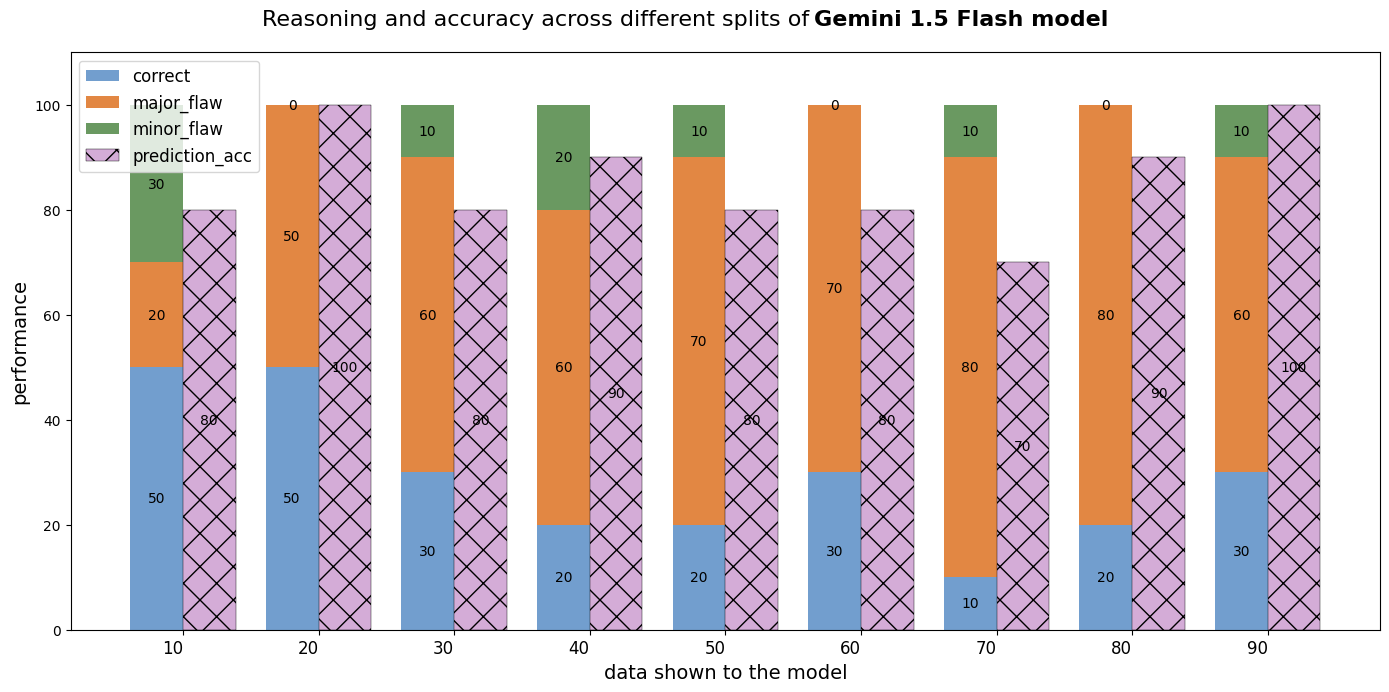

In [2]:
model = "Gemini 1.5 Flash"
# Data from your provided information, multiplied by 10
data = {
    'correct': [5, 5, 3, 2, 2, 3, 1, 2, 3],
    'major_flaw': [2, 5, 6, 6, 7, 7, 8, 8, 6],
    'minor_flaw': [3, 0, 1, 2, 1, 0, 1, 0, 1],
    'prediction_acc': [8, 10, 8, 9, 8, 8, 7, 9, 10]
}

# Multiply all values by 10
for key in data:
    data[key] = [val * 10 for val in data[key]]

labels = ["10", "20", "30", "40", "50", "60", "70", "80", "90"] # numeric labels

create_modified_stacked_bar_chart_with_gentle_academic_colors(data, labels, model)

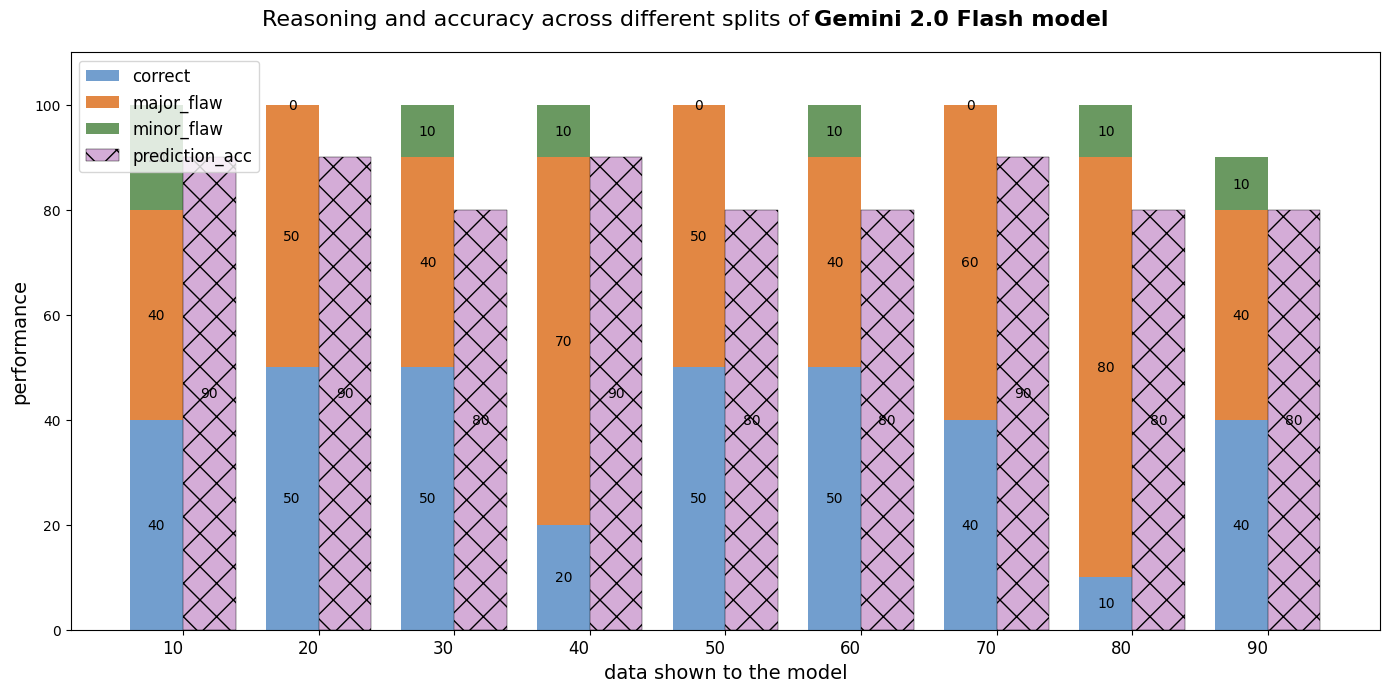

In [3]:
model = "Gemini 2.0 Flash"

data = {
    'correct': [4, 5, 5, 2, 5, 5, 4, 1, 4],
    'major_flaw': [4, 5, 4, 7, 5, 4, 6, 8, 4],
    'minor_flaw': [2, 0, 1, 1, 0, 1, 0, 1, 1],
    'prediction_acc': [9, 9, 8, 9, 8, 8, 9, 8, 8]
}

# Multiply all values by 10
for key in data:
    data[key] = [val * 10 for val in data[key]]
    
create_modified_stacked_bar_chart_with_gentle_academic_colors(data, labels, model)

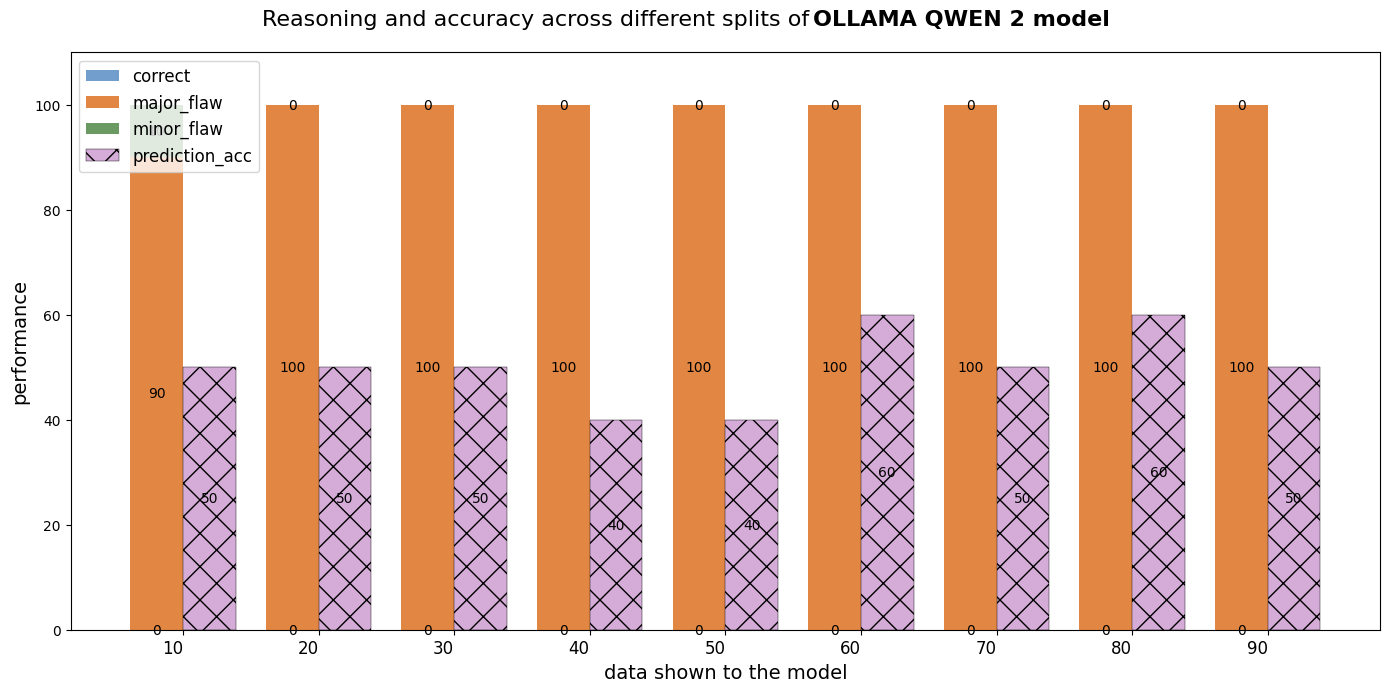

In [8]:
model = "OLLAMA QWEN 2"

data = {
    'correct': [0, 0, 0, 0, 0, 0, 0, 0, 0],
    'major_flaw': [9, 10, 10, 10, 10, 10, 10, 10, 10],
    'minor_flaw': [1, 0, 0, 0, 0, 0, 0, 0, 0],
    'prediction_acc': [5, 5, 5, 4, 4, 6, 5, 6, 5]
}


# Multiply all values by 10
for key in data:
    data[key] = [val * 10 for val in data[key]]
    
create_modified_stacked_bar_chart_with_gentle_academic_colors(data, labels, model)

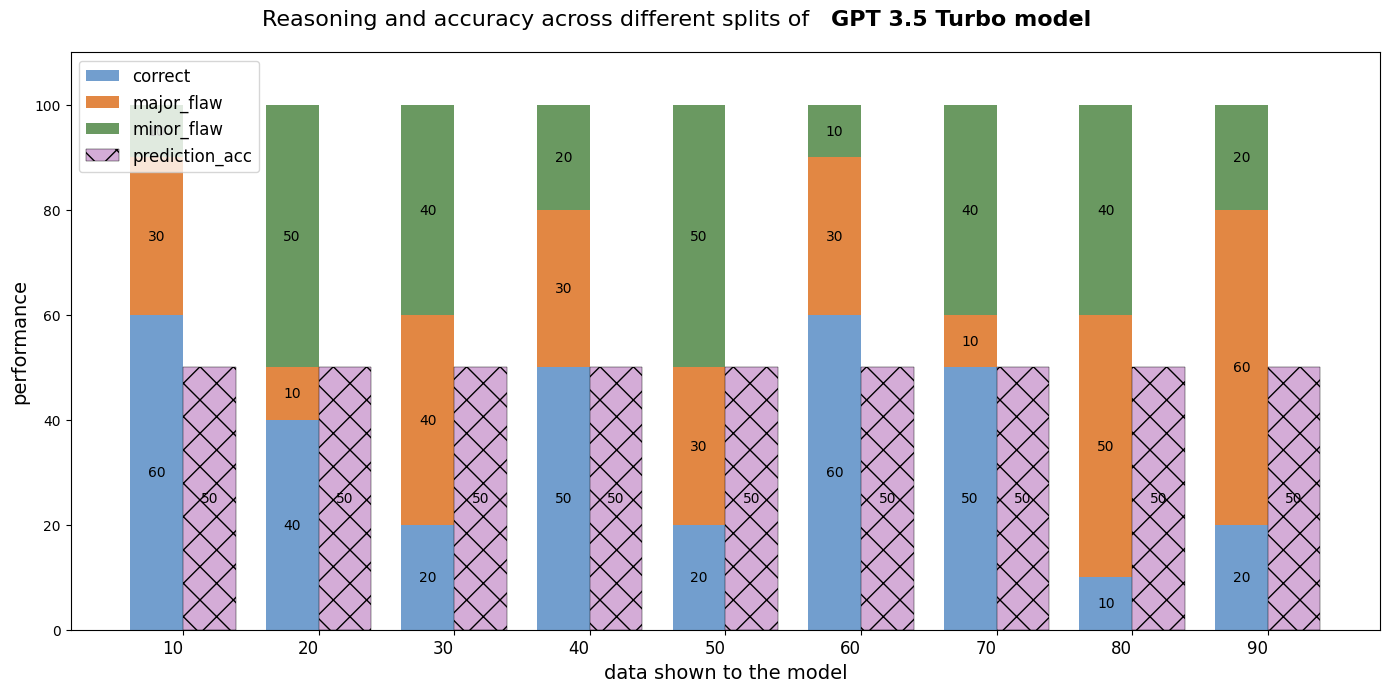

In [9]:
model = "GPT 3.5 Turbo"

data = {
    'correct': [6, 4, 2, 5, 2, 6, 5, 1, 2],
    'major_flaw': [3, 1, 4, 3, 3, 3, 1, 5, 6],
    'minor_flaw': [1, 5, 4, 2, 5, 1, 4, 4, 2],
    'prediction_acc': [5, 5, 5, 5, 5, 5, 5, 5, 5]
}


# Multiply all values by 10
for key in data:
    data[key] = [val * 10 for val in data[key]]
    
create_modified_stacked_bar_chart_with_gentle_academic_colors(data, labels, model)

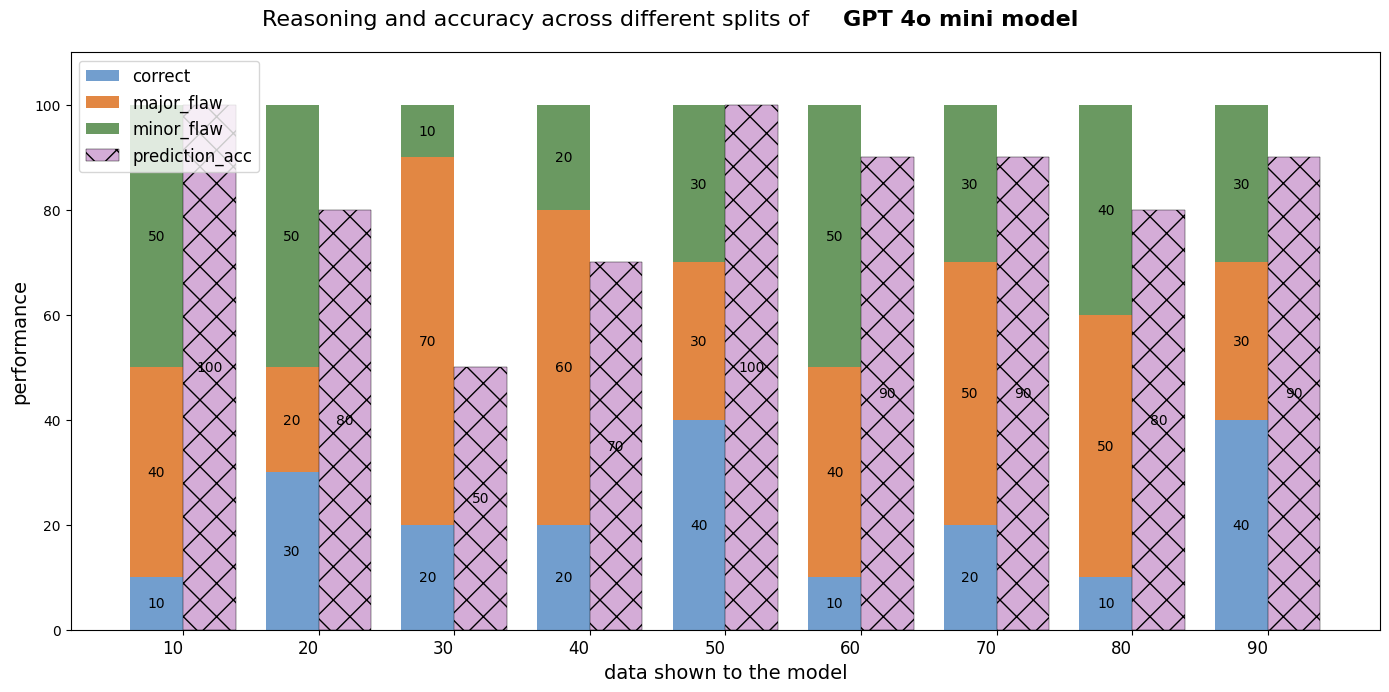

In [11]:
model = "GPT 4o mini"

data = {
    'correct':    [1, 3, 2, 2, 4, 1, 2, 1, 4],
    'major_flaw': [4, 2, 7, 6, 3, 4, 5, 5, 3],
    'minor_flaw': [5, 5, 1, 2, 3, 5, 3, 4, 3],
    'prediction_acc': [10, 8, 5, 7, 10, 9, 9, 8, 9]
}


# Multiply all values by 10
for key in data:
    data[key] = [val * 10 for val in data[key]]
    
create_modified_stacked_bar_chart_with_gentle_academic_colors(data, labels, model)

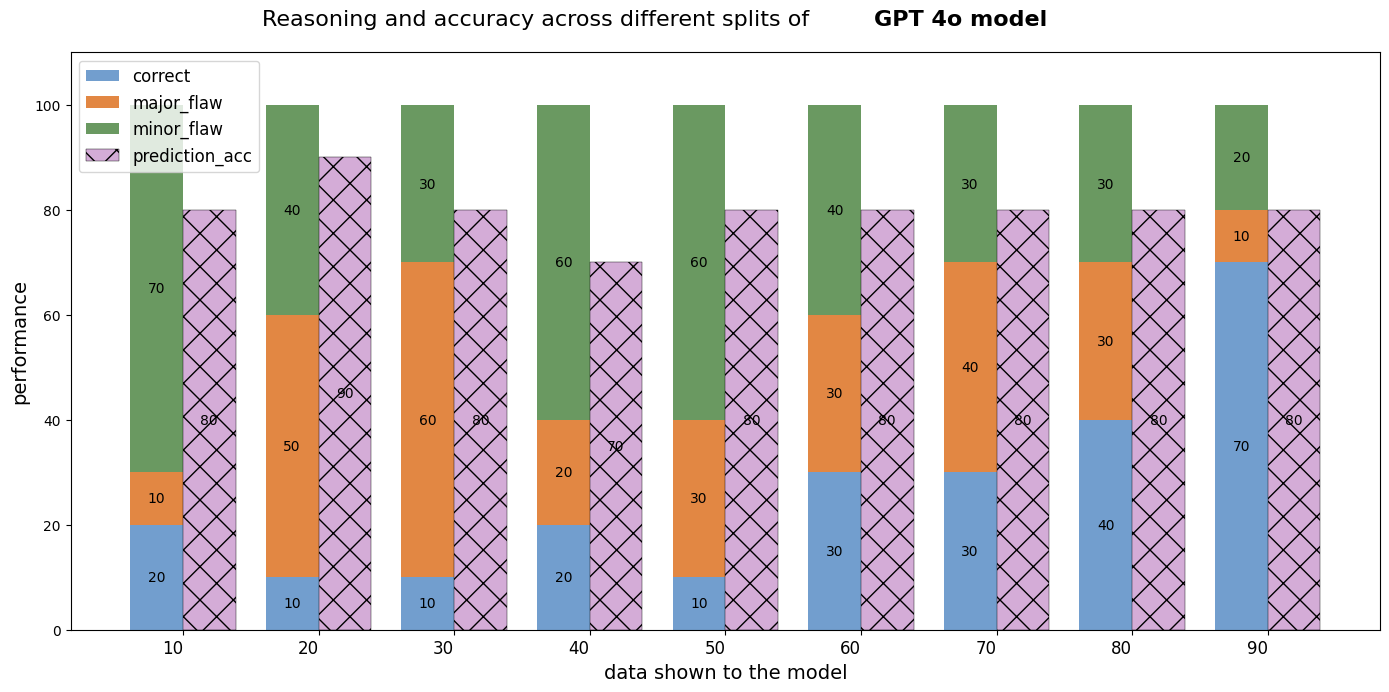

In [12]:
model = "GPT 4o"

data = {
    'correct':    [2, 1, 1, 2, 1, 3, 3, 4, 7],
    'major_flaw': [1, 5, 6, 2, 3, 3, 4, 3, 1],
    'minor_flaw': [7, 4, 3, 6, 6, 4, 3, 3, 2],
    'prediction_acc': [8, 9, 8, 7, 8, 8, 8, 8, 8]
}



# Multiply all values by 10
for key in data:
    data[key] = [val * 10 for val in data[key]]
    
create_modified_stacked_bar_chart_with_gentle_academic_colors(data, labels, model)